In [1]:
import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [2]:
print(train_input.shape, test_input.shape)

(60000, 28, 28) (10000, 28, 28)


In [3]:
import numpy as np
np.unique(train_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

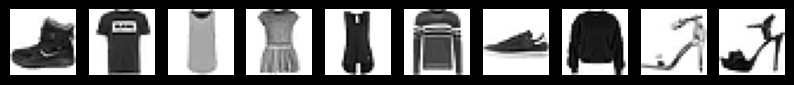

In [4]:
import matplotlib.pyplot as plt

_, axs = plt.subplots(1, 10, figsize=(10,1))
for i in range(10):
    axs[i].imshow(train_input[i], cmap="gray_r")
    axs[i].axis('off')

plt.show()

In [5]:
# 정규화
train_scaled = train_input / 255.0
train_scaled[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [6]:
# 28 x 28 사이즈의 이미지를 1차원 배열 형태로 변경
train_scaled = train_scaled.reshape(-1, 28 * 28)
train_scaled[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [7]:
# 훈련 세트, 검증 세트
from sklearn.model_selection import train_test_split

train_scaled, val_input, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [8]:
train_scaled.shape

(48000, 784)

In [9]:
# keras를 이용한 입력층 출력층 구성
inputs = keras.layers.Input(shape=(784,)) # 784개의 입력층 구성
ouput = keras.layers.Dense(10, activation='softmax') # 출력층 구성 || 분류 모델이기 때문에 활성화 함수 지정 || 절편 10개
model = keras.Sequential([inputs, ouput])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# 컴파일 : 손실 함수(loss), 옵티마이저(optimizer) 등등 설정, 측정 지표(metrics)
# categorical_crossentropy : 타겟 값을 0 ,1로 변경, one-hot encoding
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
target_encoded = keras.utils.to_categorical(train_target)

In [15]:
# 학습 하기 fit(), batch_size: 32 / 미니배치 경사 하강법, epochs : 반복 학습 횟수
# verbose : 0 - 상세 로그 출력 X , 1 - 상세 로그 출력, validation_data : 검증 세트 데이터
model.fit(train_scaled, target_encoded, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7346 - loss: 0.7866
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8372 - loss: 0.4795
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8457 - loss: 0.4569
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 978us/step - accuracy: 0.8536 - loss: 0.4328
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 993us/step - accuracy: 0.8544 - loss: 0.4282


In [16]:
# sparse_categorical_crossentropy : 정수값을 그대로 타겟으로 사용해도 crossentropy 손실 값을 계산하게 된다, 원-핫 인코딩을 생략할 수 있다.
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8566 - loss: 0.4227
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 969us/step - accuracy: 0.8577 - loss: 0.4213
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8601 - loss: 0.4123
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 969us/step - accuracy: 0.8630 - loss: 0.4126
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8615 - loss: 0.4145


In [ ]:
# 모델에 대한 평가 -> model.evaluate() || 첫째값 : loss 둘째값 : 정확도
test_scaled = test_input / 255.0
test_scaled = test_scaled.reshape(-1, 28 * 28)
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.8481 - loss: 0.4561


[0.46918588876724243, 0.843500018119812]